**Step 1:**

1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)

In [1]:
import math
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [2]:
tf.__version__

'2.4.1'

In [3]:
images = np.load('/content/drive/MyDrive/Colab Notebooks/Project_AIML_ANN/CNN_Project/images.npy')


In [4]:
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_AIML_ANN/CNN_Project/Labels.csv')

In [5]:
images.shape

(4750, 128, 128, 3)

In [6]:
labels.shape

(4750, 1)

In [7]:
# null 
labels.isnull().sum()

Label    0
dtype: int64

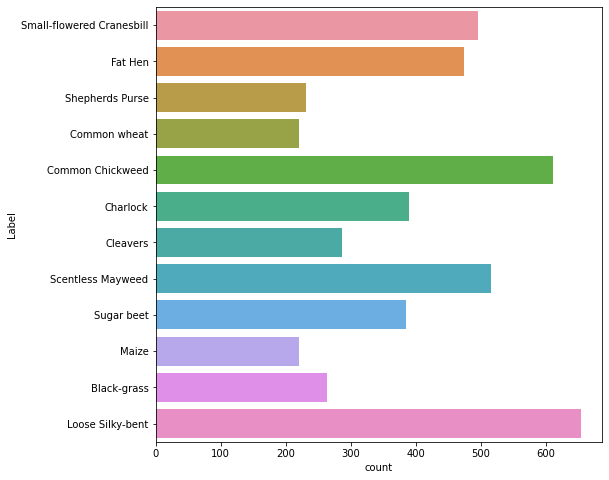

In [8]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.countplot(y=labels.Label);

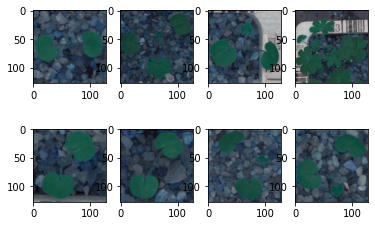

In [9]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])

**Step 2: Data Pre-processing: (15 Marks)**

*   Normalization.
*   Gaussian Blurring.
*   Visualize data after pre-processing.




In [10]:
images = images.astype('float32')
images /=255


In [11]:
print("images shape:", images.shape)
print("Images in images:", images.shape[0])
print("Max value in images:", images.max())
print("Min value in images:", images.min())

images shape: (4750, 128, 128, 3)
Images in images: 4750
Max value in images: 1.0
Min value in images: 0.0


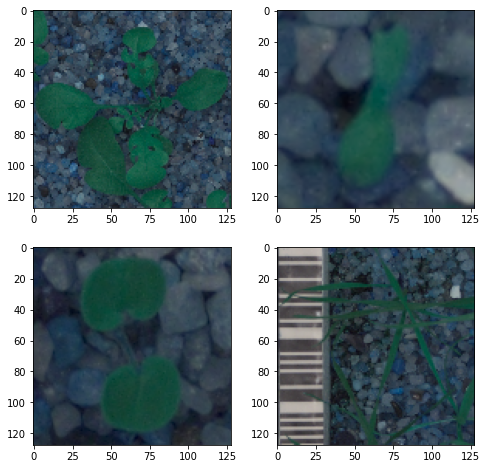

In [12]:
f, axarr = plt.subplots(2,2, figsize=(8,8))
axarr[0,0].imshow(images[1000])
axarr[0,1].imshow(images[3098])
axarr[1,0].imshow(images[150])
axarr[1,1].imshow(images[4649]);

In [15]:
#blur = cv2.GaussianBlur(images,(5,5),0)

for idx, img in enumerate(images):
  images[idx] = cv2.GaussianBlur(img, (5,5),0)


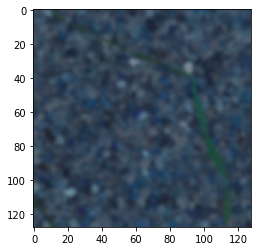

In [16]:
plt.imshow(images[4000],cmap='gray')

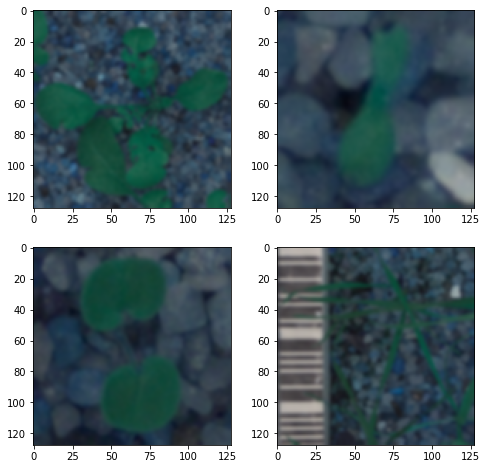

In [17]:
f, axarr = plt.subplots(2,2, figsize=(8,8))
axarr[0,0].imshow(images[1000],cmap='gray')
axarr[0,1].imshow(images[3098],cmap='gray')
axarr[1,0].imshow(images[150],cmap='gray')
axarr[1,1].imshow(images[4649],cmap='gray');

**3. Make data compatible: (10 Marks)**

* Convert labels to one-hot-vectors.
* Print the label for y_train[0].
* Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
* Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [18]:
labels_oneHot=pd.get_dummies(labels)
labels_oneHot.head()

,Label_Black-grass,Label_Charlock,Label_Cleavers,Label_Common Chickweed,Label_Common wheat,Label_Fat Hen,Label_Loose Silky-bent,Label_Maize,Label_Scentless Mayweed,Label_Shepherds Purse,Label_Small-flowered Cranesbill,Label_Sugar beet
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_oneHot, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1)

In [20]:
print('X_train shapes', X_train.shape)
print('y_train shapes', y_train.shape)

print('X_val shapes', X_val.shape)
print('y_val shapes', y_val.shape)

print('X_test shapes', X_test.shape)
print('y_test shapes', y_test.shape)

X_train shapes (1662, 128, 128, 3)
y_train shapes (1662, 12)
X_val shapes (1663, 128, 128, 3)
y_val shapes (1663, 12)
X_test shapes (1425, 128, 128, 3)
y_test shapes (1425, 12)


**Step 4: Building CNN: (15 Marks)**

* Define layers.
* Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [21]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense, Flatten

In [22]:
# set the model cnn

batch_size = None

model = Sequential()


In [23]:
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(Flatten())


model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))



In [25]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Step 5: Fit and evaluate model and print confusion matrix. (10 Marks)**

In [26]:
# fit the model

history=model.fit(x = X_train, y=y_train, validation_data = (X_val, y_val), epochs = 25)

Epoch 1/25
52/52 [==============================] - 10s 49ms/step - loss: 4.8248 - accuracy: 0.1389 - val_loss: 6.8862 - val_accuracy: 0.0517
Epoch 2/25
52/52 [==============================] - 2s 34ms/step - loss: 2.2500 - accuracy: 0.2435 - val_loss: 10.5670 - val_accuracy: 0.0517
Epoch 3/25
52/52 [==============================] - 2s 35ms/step - loss: 1.9006 - accuracy: 0.3782 - val_loss: 11.2129 - val_accuracy: 0.0517
Epoch 4/25
52/52 [==============================] - 2s 35ms/step - loss: 1.6574 - accuracy: 0.4505 - val_loss: 14.0844 - val_accuracy: 0.1431
Epoch 5/25
52/52 [==============================] - 2s 36ms/step - loss: 1.5114 - accuracy: 0.4831 - val_loss: 12.6478 - val_accuracy: 0.1149
Epoch 6/25
52/52 [==============================] - 2s 36ms/step - loss: 1.3507 - accuracy: 0.5256 - val_loss: 14.4626 - val_accuracy: 0.0595
Epoch 7/25
52/52 [==============================] - 2s 36ms/step - loss: 1.2580 - accuracy: 0.5582 - val_loss: 9.4987 - val_accuracy: 0.1714
Epoch 8

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

<Figure size 1440x720 with 0 Axes>

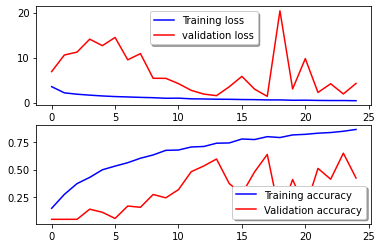

In [28]:
# Visualizing the training


plt.figure(figsize=(20,10))
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [29]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 1s 12ms/step - loss: 4.4248 - accuracy: 0.4035
Test loss: 4.424834251403809
Test accuracy: 0.4035087823867798


In [30]:
# Predict the model
y_predict = model.predict(X_test)

In [31]:
y_predict

array([[3.7840944e-06, 1.0392003e-03, 2.2519585e-05, ..., 1.6339121e-02,
        5.5419558e-01, 3.6088578e-02],
       [8.6251037e-13, 6.0264530e-05, 1.9193622e-10, ..., 4.4752086e-09,
        2.1399783e-10, 9.9977642e-01],
       [4.4264518e-19, 2.1503414e-08, 2.6630826e-19, ..., 4.4184516e-13,
        1.1951008e-18, 9.9997902e-01],
       ...,
       [2.3049727e-08, 2.2576591e-04, 2.3304933e-08, ..., 1.9034106e-06,
        6.1726168e-06, 9.8377693e-01],
       [3.0485597e-01, 7.5413544e-07, 8.6018794e-08, ..., 6.5680666e-08,
        4.5986458e-06, 3.1289529e-02],
       [2.8626368e-04, 1.3443175e-06, 7.8285272e-09, ..., 1.5833294e-07,
        6.9572876e-09, 8.4594619e-01]], dtype=float32)

In [32]:
y_test.shape

(1425, 12)

In [33]:
y_predict.shape

(1425, 12)

In [34]:
y_val.shape

(1663, 12)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report,multilabel_confusion_matrix

In [38]:
# Confusion Matrix

cm=confusion_matrix(y_test.values.argmax(axis=1), y_predict.argmax(axis=1))
cm


array([[ 16,   1,   1,   0,   7,   4,   6,   0,   1,   0,   0,  58],
       [  0, 104,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,  30,  46,   0,   0,   0,   0,   2,   0,   0,   0,   2],
       [  0,   0,   1,  99,   0,   0,   0,  22,  21,   2,   1,  35],
       [  1,   1,   4,   0,  13,   1,   0,   0,   4,   0,   0,  39],
       [  1,  11,   1,   2,   0,  26,   1,   0,   4,   0,   0,  96],
       [ 20,   1,   0,   0,  17,   3,  10,   1,  15,   0,   0, 122],
       [  0,   2,   0,   0,   0,   1,   0,  32,   5,   1,   0,  26],
       [  0,  29,   2,   1,   0,   1,   0,   7,  52,   0,   0,  58],
       [  0,  14,   0,   1,   0,   0,   0,  14,  19,  13,   1,   9],
       [  0,  44,   0,   0,   0,   0,   0,   4,   0,   0,  43,  64],
       [  0,   2,   1,   0,   0,   0,   0,   1,   2,   1,   0, 121]])

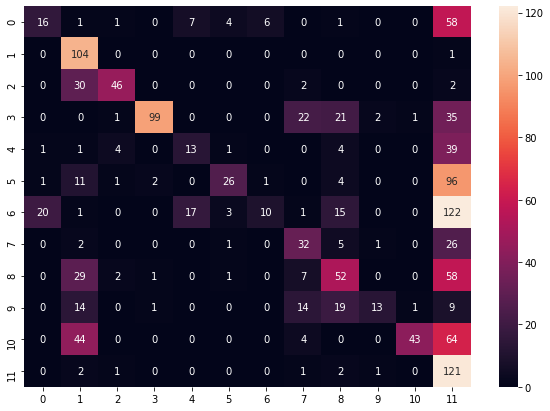

In [39]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')

In [40]:
print("=== Classification Report ===")
print(classification_report(y_test.values.argmax(axis=1), y_predict.argmax(axis=1)))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.42      0.17      0.24        94
           1       0.44      0.99      0.60       105
           2       0.82      0.57      0.68        80
           3       0.96      0.55      0.70       181
           4       0.35      0.21      0.26        63
           5       0.72      0.18      0.29       142
           6       0.59      0.05      0.10       189
           7       0.39      0.48      0.43        67
           8       0.42      0.35      0.38       150
           9       0.76      0.18      0.30        71
          10       0.96      0.28      0.43       155
          11       0.19      0.95      0.32       128

    accuracy                           0.40      1425
   macro avg       0.59      0.41      0.39      1425
weighted avg       0.62      0.40      0.39      1425



**Step 6: Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)**



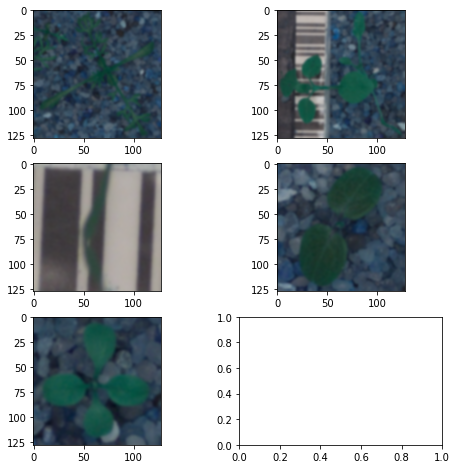

In [41]:
f, xtest = plt.subplots(3,2, figsize=(8,8))
xtest[0,0].imshow(X_test[2])
xtest[0,1].imshow(X_test[3])
xtest[1,0].imshow(X_test[33])
xtest[1,1].imshow(X_test[36])
xtest[2,0].imshow(X_test[59]);

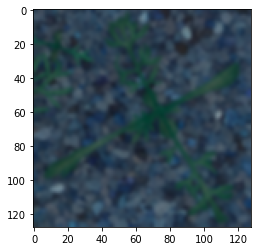

In [42]:
plt.imshow(X_test[2]);

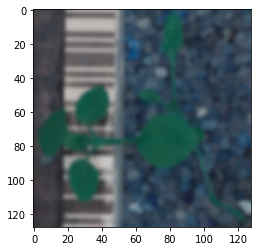

In [43]:
plt.imshow(X_test[3]);

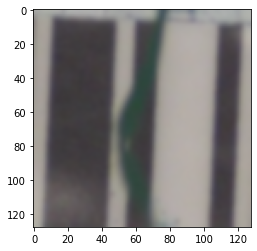

In [44]:
plt.imshow(X_test[33]);

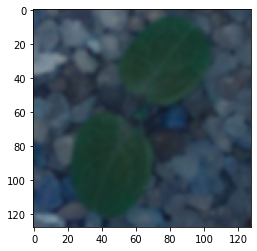

In [45]:
plt.imshow(X_test[36]);

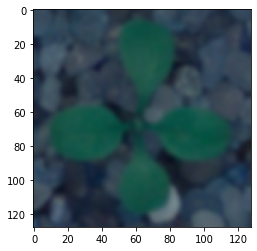

In [46]:
plt.imshow(X_test[59]);